---
# 11.1 The case for piecewise polynomial interpolation
---

In Chapter 10, we studied how to fit a single polynomial $p_n(x)$ to a function $f$ over an interval $[a,b]$ by requiring 
   
$$p_n(x_i) = f(x_i), \quad i = 0,1,\ldots,n,$$
   
for some $x_0,\ldots,x_n \in [a,b]$. There are several shortcomings of this **global** approach:
   
1. We have seen that the error

    $$f(x) - p_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n(x-x_i)$$

    may be large if $\frac{\left\|f^{(n+1)}\right\|}{(n+1)!}$ is large.

2. High order polynomials "wiggle" too much.

3. Polynomials are infinitely smooth, but the function $f$ may not have this property.

4. Changing even just a single data point may dramatically change the entire interpolating polynomial.

In this chapter, we will take a **local** approach. We will break the interval $[a,b]$ into $r$ subintervals $[t_{i-1}, t_{i}]$ using the **break points** (also called **knots**):

$$a = t_0 < t_1 < \cdots < t_r = b.$$

Over each subinterval $[t_{i-1}, t_{i}]$, we will approximate $f$ with the following low-order polynomials:

1. **Constant**:
   
    $$p_i(x) = c_i, \quad x \in [t_{i-1}, t_{i}],$$
   
2. **Linear**:

    $$p_i(x) = a_i + b_i x, \quad x \in [t_{i-1}, t_{i}],$$
   
3. **Cubic**:

    $$p_i(x) = a_i + b_ix + c_ix^2 + d_ix^3, \quad x \in [t_{i-1}, t_{i}].$$
   
We get the **piecewise polynomial** function

$$
p(x) = 
\begin{cases}
p_1(x),& \text{if $x \in [t_0,t_1)$},\\
p_2(x),& \text{if $x \in [t_1,t_2)$},\\
\vdots & \\
p_{r}(x),& \text{if $x \in [t_{r-1},t_r]$},\\
\end{cases}
$$

which gives us a **global** approximation of $f(x)$ over $[a,b]$.

---

## Example

Let's approximate $f(x) = e^x$ over $[-3,1]$ using piecewise constant and piecewise linear functions using evenly-spaced interpolation points.

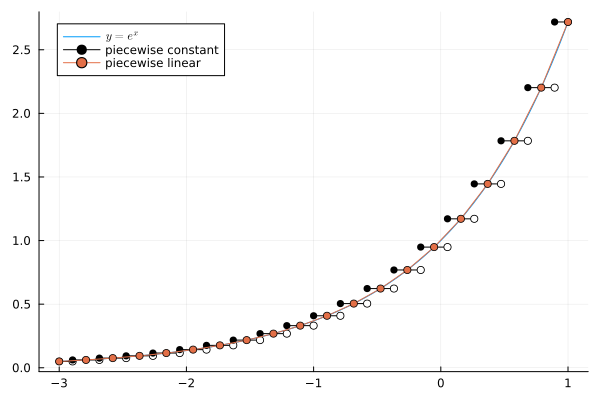

In [6]:
using Plots, LaTeXStrings

# Define f, a, b, n
f(x) = exp(x)
a, b, n = -3., 1., 20

# Create n evenly spaced interpolation points in [a,b]
xi = range(a, b, length=n)
fxi = f.(xi)

plot(legend=:topleft, aspect_ratio=:equal)

# Plot y = f(x)
plot!(f, a, b, label=L"y = e^x")

# Piecewise constant
tip1 = (xi[1]+xi[2])/2
plot!([xi[1], tip1], [fxi[1], fxi[1]], c=:black, markershape=:circle, label="piecewise constant")
scatter!([tip1], [fxi[1]], c=:white, label=:none)
for i=2:n-1
    ti = (xi[i-1]+xi[i])/2
    tip1 = (xi[i]+xi[i+1])/2
    plot!([ti, tip1], [fxi[i], fxi[i]], c=:black, markershape=:circle, label=:none)
    scatter!([tip1], [fxi[i]], c=:white, label=:none)
end
ti = (xi[n-1]+xi[n])/2
plot!([ti, xi[n]], [fxi[n], fxi[n]], c=:black, markershape=:circle, label=:none)


# Piecewise linear
plot!(xi, f.(xi), markershape=:circle, label="piecewise linear", c=2)

---